In [1]:
import pandas as pd, numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt, seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split

## Regression example using TensorFlow 2.0
Auto MPG regression task (target attribute is 'mpg')

In [2]:
print("\nCurrent version of tensorflow: {0}\n".format(tf.__version__))


Current version of tensorflow: 2.0.0



In [4]:
data = pd.read_csv("auto_mpg-processed_data.csv")

In [5]:
# Get dimension of dataset-
data.shape

(397, 9)

In [7]:
# Check for missing values in dataset-
data.isnull().any().any()

False

In [8]:
# Check for missing values-
data.isnull().sum().sum()

0

In [9]:
# Print first 8 data points of dataset-
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name_encoded
0,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,36.0
1,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,231.0
2,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,14.0
3,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,161.0
4,15.0,8.0,429.0,198.0,4341.0,10.0,70.0,1.0,141.0


In [10]:
# Drop 'car_name_encoded' attribute-
data.drop('car_name_encoded', axis = 1, inplace=True)

In [11]:
data.shape

(397, 8)

In [12]:
# Perform data normalization for numeric attributes-

# Get names of numeric attributes-
cols = data.columns.tolist()
cols.remove('origin')
cols.remove('model_year')

In [13]:
# Initialize a standard scaler-
std_scaler = StandardScaler()

# Perform standard scaling for numeric attributes-
data_scaled = std_scaler.fit_transform(data.loc[:, cols])

In [14]:
# Convert from 'numpy.ndarray' to Pandas DataFrame-
data_scaled = pd.DataFrame(data_scaled, columns=cols)

# Add  attributes to 'data_scaled'-
data_scaled['origin'] = data['origin']
data_scaled['model_year'] = data['model_year']

In [15]:
data_scaled.shape

(397, 8)

In [16]:
# Perform one hot encoding for 'origin' attribute-
one_hot_encoder = OneHotEncoder()

In [18]:
# Save 'origin' attribute-
origin = data_scaled['origin']

origin_one_hot_encoded = pd.get_dummies(data_scaled['origin'], prefix = 'origin', prefix_sep = '_')

In [19]:
# Delete 'origin' attribute from dataset-
data_scaled.drop('origin', axis = 1, inplace=True)

In [20]:
# Add attributes of one hot encoded attribute to 'data'-
for attr in origin_one_hot_encoded.columns.tolist():
    data_scaled[attr] = origin_one_hot_encoded[attr]

In [21]:
data_scaled.shape

(397, 10)

In [22]:
data_scaled.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_1.0,origin_2.0,origin_3.0
0,-1.091843,1.504336,1.506627,1.590532,0.855275,-1.481575,70.0,1,0,0
1,-0.707773,1.504336,1.199270,1.199049,0.551642,-1.663271,70.0,1,0,0
2,-0.963820,1.504336,1.064801,1.199049,0.548098,-1.299879,70.0,1,0,0
3,-0.835796,1.504336,1.045591,0.938060,0.567001,-1.844967,70.0,1,0,0
4,-1.091843,1.504336,2.265414,2.451796,1.620855,-2.026662,70.0,1,0,0
5,-1.219867,1.504336,2.505536,3.025971,1.636214,-2.390054,70.0,1,0,0
6,-1.219867,1.504336,2.371068,2.895477,1.586593,-2.571749,70.0,1,0,0
7,-1.219867,1.504336,2.515141,3.156466,1.720097,-2.026662,70.0,1,0,0
8,-1.091843,1.504336,1.890823,2.243005,1.040763,-2.571749,70.0,1,0,0
9,-1.091843,1.504336,1.823588,1.721027,0.701686,-2.026662,70.0,1,0,0


In [23]:
# Split dataset into features (X) and target (y)-
X = data_scaled.drop('mpg', axis = 1)
y = data_scaled['mpg']

In [24]:
# Split features & target into training and testing sets-
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
print("\nTraining and testing shapes are:")
print("X_train = {0}, y_train = {1}, X_test = {2} and y_test = {3}\n".format(X_train.shape, y_train.shape, X_test.shape, y_test.shape))


Training and testing shapes are:
X_train = (265, 9), y_train = (265,), X_test = (132, 9) and y_test = (132,)



In [25]:
# Make numpy.ndarray-
X_train_n = X_train.values
X_test_n = X_test.values

### Construct neural network for Supervised Regression task:

In [27]:
def build_model():
    '''
    Function to create/build the NN model which will be used for training
    on the available dataset
    '''
    model = keras.Sequential([
        # 9 neurons for 9 input plus 1 for bias-
        layers.Dense(10, activation = 'relu', input_shape = (X_train.shape[1], )),
        # layers.Dense(64, activation = 'relu', input_shape = (X_train.shape[1], )),
        # layers.Dense(64, activation = 'relu'),
        # layers.Dense(64, activation = 'relu'),
        layers.Dense(10, activation = 'relu'),
        layers.Dense(1)
        ])

    # optimizer = tf.keras.optimizers.RMSprop(0.001)
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001) 

    model.compile(loss = 'mse', optimizer = optimizer,
            metrics = ['mae', 'mse'])

    return model


In [28]:
# Instantiate model-
nn_model = build_model()

In [29]:
# To get information/summary about the constructed NN model-
nn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                100       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


In [30]:
# Sanity check- See if the constructed model works on a toy data sample-
# data sample size of 25 examples-
example_batch = X_train_n[:25]
example_result = nn_model.predict(example_batch)

example_result.shape

(25, 1)

In [31]:
# 'patience' parameter is the number of epochs to check for improvement-
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

In [32]:
# Train the constructed model-
# Train the model for 1000 epochs, and record the training and validation
# accuracy in the 'history' object
'''
history = nn_model.fit(X_train_n, y_train.values, epochs=1000,
        validation_data=(X_test_n, y_test.values), verbose=1,
        callbacks = [early_stop])
'''
history = nn_model.fit(X_train_n, y_train.values, epochs=1000,
        validation_data=(X_test_n, y_test.values), verbose=1)

Train on 265 samples, validate on 132 samples
Epoch 1/1000
265/265 [==============================] - 1s 4ms/sample - loss: 448.3530 - mae: 21.1319 - mse: 448.3530 - val_loss: 360.3085 - val_mae: 18.9630 - val_mse: 360.3085
Epoch 2/1000
265/265 [==============================] - 0s 203us/sample - loss: 304.0106 - mae: 17.3915 - mse: 304.0107 - val_loss: 238.0701 - val_mae: 15.4076 - val_mse: 238.0701
Epoch 3/1000
265/265 [==============================] - 0s 197us/sample - loss: 196.8171 - mae: 13.9743 - mse: 196.8171 - val_loss: 143.6419 - val_mae: 11.9552 - val_mse: 143.6418
Epoch 4/1000
265/265 [==============================] - 0s 189us/sample - loss: 108.2794 - mae: 10.3191 - mse: 108.2794 - val_loss: 65.8268 - val_mae: 8.0642 - val_mse: 65.8268
Epoch 5/1000
265/265 [==============================] - 0s 195us/sample - loss: 45.0813 - mae: 6.5822 - mse: 45.0813 - val_loss: 22.0408 - val_mae: 4.5977 - val_mse: 22.0408
Epoch 6/1000
265/265 [==============================] - 0s 194us/

In [33]:
# Visualize the model's training progress using the stats stored in the
# 'history' object-
history_df = pd.DataFrame(history.history)
history_df['epoch'] = history.epoch

history_df.shape

(1000, 7)

In [34]:
# Print first 10 rows-
history_df.head(10)

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
0,448.352990,21.131908,448.352966,360.308485,18.962971,360.308502,0
1,304.010616,17.391531,304.010651,238.070124,15.407601,238.070114,1
2,196.817112,13.974322,196.817108,143.641853,11.955234,143.641846,2
3,108.279444,10.319079,108.279434,65.826797,8.064235,65.826797,3
4,45.081277,6.582199,45.081276,22.040845,4.597708,22.040844,4
5,13.374630,3.446508,13.374631,4.785544,1.975416,4.785544,5
6,2.727692,1.452167,2.727692,1.134547,0.893224,1.134547,6
7,1.165444,0.837314,1.165444,1.317125,0.880360,1.317125,7
8,1.423933,0.877544,1.423933,1.397820,0.896355,1.397820,8
9,1.342407,0.843817,1.342407,1.144751,0.814526,1.144751,9


<Figure size 1200x960 with 0 Axes>

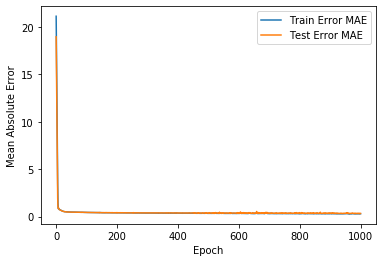

In [37]:
# Visualize training and testing metrics-

fig=plt.figure(figsize=(15, 12), dpi= 80, facecolor='w', edgecolor='k')

# For Mean Absolute Error (MAE)-
plt.figure()
plt.xlabel("Epoch")
plt.ylabel("Mean Absolute Error")

plt.plot(history_df['epoch'], history_df['mae'], label = 'Train Error MAE')
plt.plot(history_df['epoch'], history_df['val_mae'], label = 'Test Error MAE')
plt.legend()
plt.show()

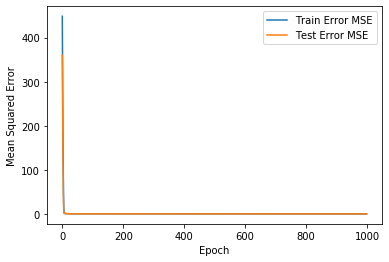

In [38]:
# For Mean Squared Error (MSE)-
plt.figure()
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error")

plt.plot(history_df['epoch'], history_df['mse'], label = 'Train Error MSE')
plt.plot(history_df['epoch'], history_df['val_mse'], label = 'Test Error MSE')
plt.legend()

plt.show()

In [39]:
# Make predictions using trained model-
y_pred = nn_model.predict(X_test_n)

mae_model = mean_absolute_error(y_test, y_pred)
mse_model = mean_squared_error(y_test, y_pred)
r2_score_model = r2_score(y_test, y_pred)

print("\nModel metrics on testing set are:")
print("MAE = {0:.4f}, MSE = {1:.4f} & R2-score = {2:.4f}\n".format(mae_model, mse_model, r2_score_model))


Model metrics on testing set are:
MAE = 0.3278, MSE = 0.1785 & R2-score = 0.8218



In [40]:
# Evaluate trained model-
loss, mae, mse = nn_model.evaluate(X_test_n, y_test.values, verbose=1)

print("\nTesting set metrics are: ")
print("loss (MSE) = {0:4f}, MAE = {1:.4f} & MSE = {2:.4f}\n".format(loss, mae, mse))

132/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================